## Problem Statement:
The client is an Insurance company that has provided Health Insurance to its customers now they need help in building a model to predict whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company.



## Bussiness Goal

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [467]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [468]:
df=pd.read_csv('/content/drive/MyDrive/ML/Portfolio Projects/Health Insurance Cross Sell Prediction /train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# Data Description

id: Unique ID for the customer

Gender: Gender of the customer

Age: Age of the customer

Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code: Unique code for the region of the customer

Previously_Insured 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age: Age of the Vehicle

Vehicle_Damage 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium: The amount customer needs to pay as premium in the year

PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage: Number of Days, Customer has been associated with the company

Response 1 : Customer is interested, 0 : Customer is not interested

In [469]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### We have no Missing Values in our Dataset.

## Ananlysing Features

<Figure size 3600x720 with 0 Axes>

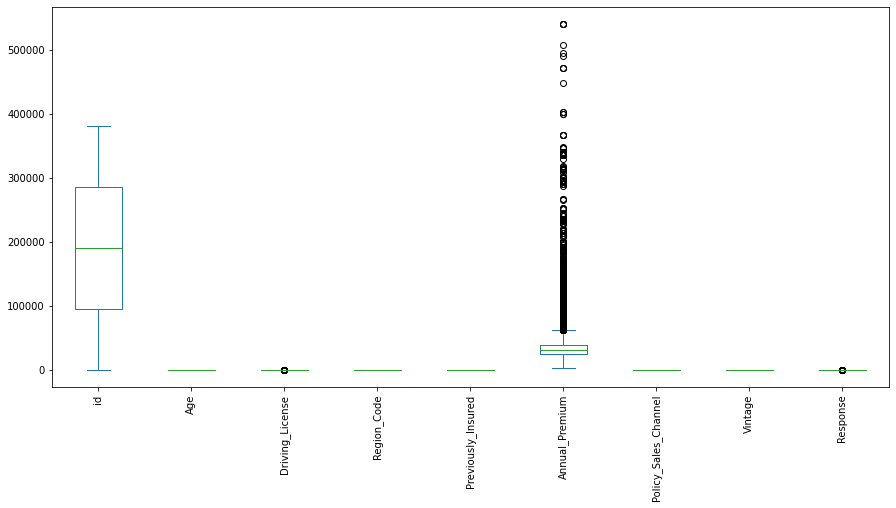

In [470]:
plt.figure(figsize=(50,10))
df.plot.box(figsize=(15, 7))
plt.xticks(rotation=90)
plt.show()

### There are many outliers in the column Annual_Premium 

## Gender:

In [471]:
gender=df['Gender'].value_counts()
gender

Male      206089
Female    175020
Name: Gender, dtype: int64

In [472]:
df.groupby('Gender')['Response'].value_counts()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: Response, dtype: int64

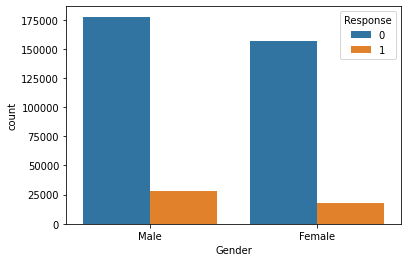

In [473]:
sns.countplot(data=df,x='Gender',hue='Response')

### Number of Males is higher than number of female customers
### Out of total,more number of male customers have bought the policy as compared to female customers.

## Driving_License:

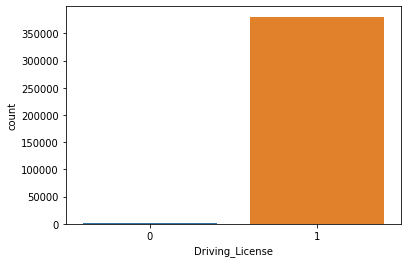

In [474]:
sns.countplot(data=df,x='Driving_License')

In [475]:
df.groupby('Gender')['Driving_License'].value_counts()


Gender  Driving_License
Female  1                  174808
        0                     212
Male    1                  205489
        0                     600
Name: Driving_License, dtype: int64

In [476]:
df[(df['Driving_License']==0) & (df['Response']==1)].shape  

(41, 12)

In [477]:
df[(df['Driving_License']==0) & (df['Response']==1) & (df['Vehicle_Damage']=='Yes')].shape

(41, 12)

### There are 41 people having No Driving_License and have bought the insurance policy.
### All of these customers have their Vehicle damaged.
### Discarding these customers and not approaching these customers for Vehicle insurance policy could save the company from any kind of frauds 

In [478]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

#### Total customers holding driving license are 380297.

### We will be removing all the 812 entires who do not have their driving license as it is mandatory document for insuring your vehicle in data preprocessing step.

## Age:

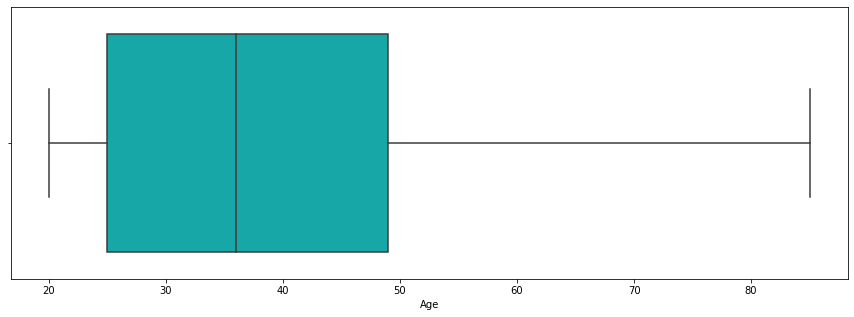

In [479]:
plt.figure(figsize=(15,5))
age=sns.boxplot(data=df,x='Age',color="c")
plt.show(age)

<Figure size 1440x720 with 0 Axes>

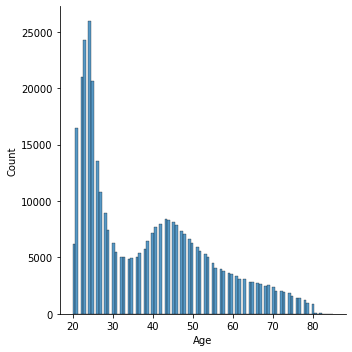

In [480]:
plt.figure(figsize=(20,10))
sns.displot(df, x="Age")
plt.show()

In [481]:
Age=df['Age']
print("Age Boxplot details: ")
print("Minimum: ",min(Age))
print("Maximum: ",max(Age))
print("Quantile Q1: ",np.quantile(Age,0.25))
print("Median Q2: ",np.median(Age))
print("Quantile Q3: ",np.quantile(Age,0.75))

Age Boxplot details: 
Minimum:  20
Maximum:  85
Quantile Q1:  25.0
Median Q2:  36.0
Quantile Q3:  49.0


### Most of the customers ages are in the range 25 to 50 years
### There are no outliers in the age column 

In [482]:
r1=df[(df['Age']>=25) & (df['Age']<=49) & (df['Response']==1)].shape
r1

(30236, 12)

In [483]:
r2=df[(df['Age']>=25) & (df['Age']<=49) & (df['Response']==0)].shape
r2

(162197, 12)

In [484]:
df[(df['Age']<25)].shape

(93869, 12)

In [485]:
r3=df[(df['Age']<25) & (df['Response']==1)].shape
r3

(3313, 12)

In [486]:
r4=df[(df['Age']<25) & (df['Response']==0)].shape
r4


(90556, 12)

In [487]:
df[(df['Age']>49)].shape

(94807, 12)

In [488]:
r5=df[(df['Age']>49) & (df['Response']==1)].shape
r5

(13161, 12)

In [489]:
r6=df[(df['Age']>49) & (df['Response']==0)].shape
r6

(81646, 12)

In [490]:
total=df['Age'].shape
total

(381109,)

In [491]:
a1=[r1[0],r2[0],r3[0],r4[0],r5[0],r6[0]]
a1

[30236, 162197, 3313, 90556, 13161, 81646]

### Policy Response as per Age Distribution
### Quantile age range: 25 to 49

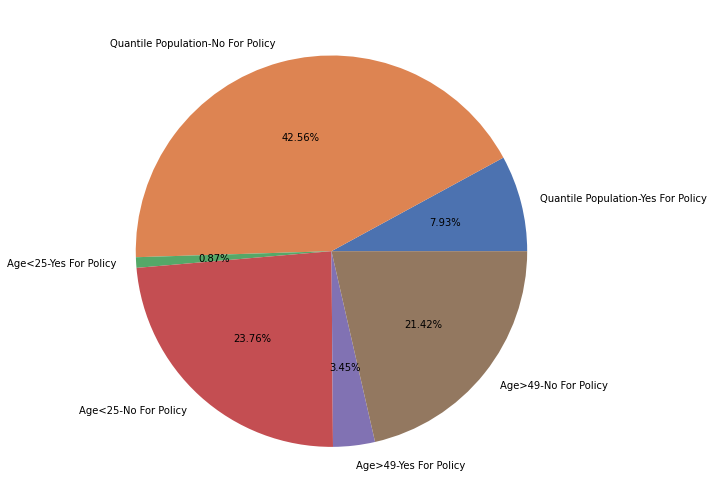

In [492]:
data = a1
label = ['Quantile Population-Yes For Policy', 'Quantile Population-No For Policy','Age<25-Yes For Policy','Age<25-No For Policy','Age>49-Yes For Policy','Age>49-No For Policy']
  
color = sns.color_palette('deep')

plt.figure(figsize=(25,9))
plt.pie(data, labels=label, colors=color, autopct='%.2f%%')
plt.show()

### **43.63%** of the people, which belong to the age group **25-49 years** have not bought the insurance policy. Only **7.95%** of the people belonging to this age group have bought the policy.
### Only **0.87%** of the total population belonging to age below 25 (young population) have bought the policy.
### **3.45 %** of the total population with age greater than 49 bought the insurance policy.



### Checking if we have balanced or imbalanced data

In [493]:
count=pd.value_counts(df['Response'],sort=True)

In [494]:
count

0    334399
1     46710
Name: Response, dtype: int64

In [495]:
df.shape

(381109, 12)

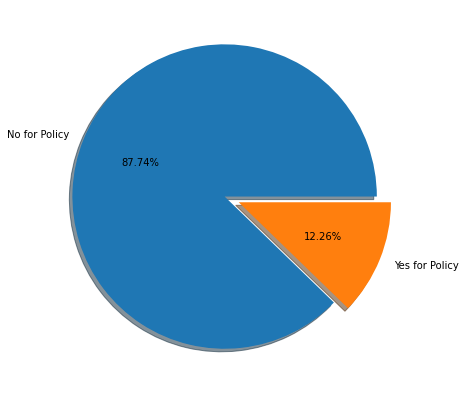

In [496]:
plt.figure(figsize=(15,7))
plt.pie(df['Response'].value_counts(),autopct='%.2f%%',shadow=True,radius=1,explode=[0,0.1],labels=['No for Policy','Yes for Policy'])
plt.show()

### Only **12.27%** of the customers have bought the vehicle insurance policy. Hence the data is highly imbalanced.

## Region_Code:

In [497]:
df['Region_Code'].head()

0    28.0
1     3.0
2    28.0
3    11.0
4    41.0
Name: Region_Code, dtype: float64

In [498]:
df['Region_Code'].nunique()

53

In [499]:
df['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [500]:
df['Region_Code']=df['Region_Code'].astype(int)
df['Region_Code'].head()

0    28
1     3
2    28
3    11
4    41
Name: Region_Code, dtype: int64

In [501]:
res_1=df[(df['Response']==1)]  ## Number of customers who bought the policy. Response = 1
res_1.shape

(46710, 12)

In [502]:
rc=res_1['Region_Code'].value_counts()
r=pd.DataFrame({'Index':rc.index,'Values':rc.values})
r.head()

,Index,Values
0,28,19917
1,8,3257
2,41,2224
3,46,2032
4,29,1365


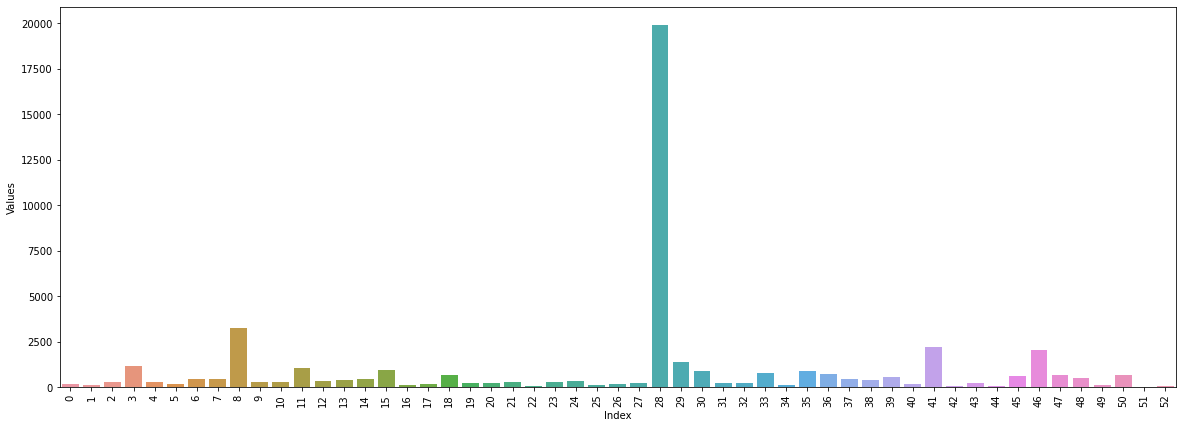

In [503]:
plt.figure(figsize=(20,7))
sns.barplot(data=r,x='Index',y='Values')
plt.xticks(rotation=90)
plt.show()

### 53 different regions
### Maximum customers who bought the policy are from region 28

## Policy_Sales_Channel	

In [504]:
df['Policy_Sales_Channel'].nunique()

155

In [505]:
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [506]:
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].astype(int)
df['Policy_Sales_Channel'].head()

0     26
1     26
2     26
3    152
4    152
Name: Policy_Sales_Channel, dtype: int64

In [507]:
psc=df['Policy_Sales_Channel'].value_counts()  
psc

152    134784
26      79700
124     73995
160     21779
156     10661
        ...  
149         1
43          1
144         1
143         1
41          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [508]:
psc.idxmax()

152

### Policy Sales channel 152 has been used in maximum.

In [509]:
df[(df['Policy_Sales_Channel']==152.0) & (df['Response']==1)]['Response'].count()

3858

### Only 3858 from Policy Sales channel 152.0 have bought the insurance policy.

In [510]:
df[(df['Response']==1)]['Policy_Sales_Channel'].value_counts().max()

15891

In [511]:
df[(df['Response']==1)]['Policy_Sales_Channel'].value_counts().idxmax()

26

### Maximum response for buying the policy was received from Policy Sales channel 26.0

In [512]:
df[(df['Response']==0)]['Policy_Sales_Channel'].value_counts().min()

1

In [513]:
df[(df['Response']==0)]['Policy_Sales_Channel'].value_counts().idxmin()

84

### Only 1 person bought the policy from Policy_Sales_Channel 84.0

## Vehichle_age:

In [514]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

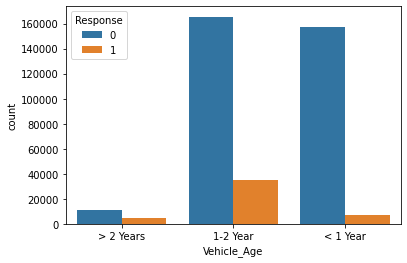

In [515]:
sns.countplot(data=df,x='Vehicle_Age',hue='Response')

In [516]:
df.groupby('Vehicle_Age')['Response'].value_counts()

Vehicle_Age  Response
1-2 Year     0           165510
             1            34806
< 1 Year     0           157584
             1             7202
> 2 Years    0            11305
             1             4702
Name: Response, dtype: int64

### Most of the customers buying the insurance policy have their vehicle age between 1-2 year.
### Least number of policies is bought by the customer having Vehicle age greater than 2 years

### Previously_Insured:

In [517]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

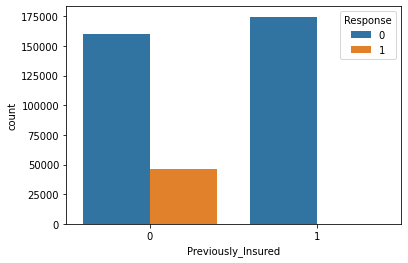

In [518]:
sns.countplot(data=df,x='Previously_Insured',hue='Response')

In [519]:
df.groupby('Previously_Insured')['Response'].value_counts()

Previously_Insured  Response
0                   0           159929
                    1            46552
1                   0           174470
                    1              158
Name: Response, dtype: int64

### Most of the people who are not previously insured are buying the insurance policy.

In [520]:
#sns.countplot(data=df,x='Previously_Insured',hue='Vehicle_Age')

## Vehicle_Damage

In [521]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

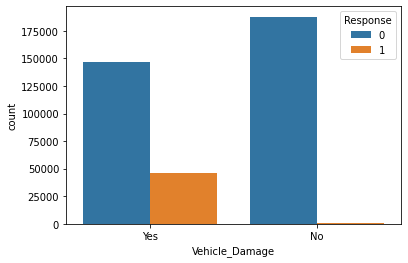

In [522]:
sns.countplot(data=df,x='Vehicle_Damage',hue='Response')

In [523]:
count1=df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
count1

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


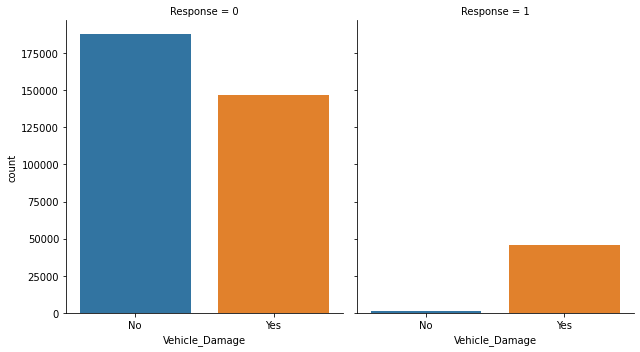

In [524]:
sns.catplot(x="Vehicle_Damage", y="count",col="Response",data=count1, kind="bar",aspect=0.9)  # Aspect – Ratio of every aspect/graph for visualizing

### Most of the customers having damaged vehicles are buying the insurance policy

In [525]:
p=df.groupby(['Previously_Insured','Vehicle_Age','Vehicle_Damage'])['Response'].value_counts()
p=pd.DataFrame(p)
p

Response
Previously_Insured Vehicle_Age Vehicle_Damage Response          
0                  1-2 Year    No             0            12106
                                              1              557
                               Yes            0            88174
                                              1            34154
                   < 1 Year    No             0            10966
                                              1              353
                               Yes            0            37423
                                              1             6787
                   > 2 Years   No             0                8
                               Yes            0            11252
                                              1             4701
1                  1-2 Year    No             0            59389
                                              1               39
                               Yes            0             5841
                                              1               56
                   < 1 Year    No             0           105238
                                              1               33
                               Yes            0             3957
                                              1               29
                   > 2 Years   No             0                7
                               Yes            0               38
                                              1                1

### Total Number of Most Targeted Customers should be:
### Not Previously Insured,Vehicle age: 1-2 Year & < 1 Year and the Vehicle is Damaged = 87750 + 34118 + 37422 + 6787 = **1,66,077**
### Out of these only **40,905** have bought the insurance policy.

###  Also, we observer, customers having Vehicle age **greater than 2years** and having **No damage** are **not buying** the Insurance Policy.

## Annual_Premium

In [526]:
df['Annual_Premium'].mean()

30564.389581458323

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


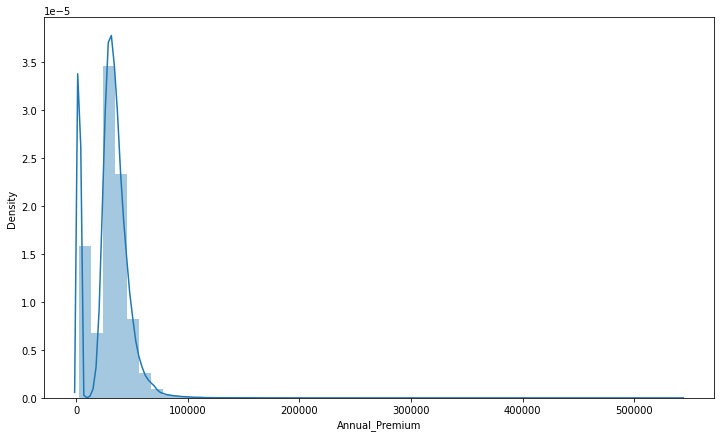

In [527]:
ap=df['Annual_Premium']
plt.figure(figsize=(12,7))
sns.distplot(a=ap,hist=True)
plt.show()

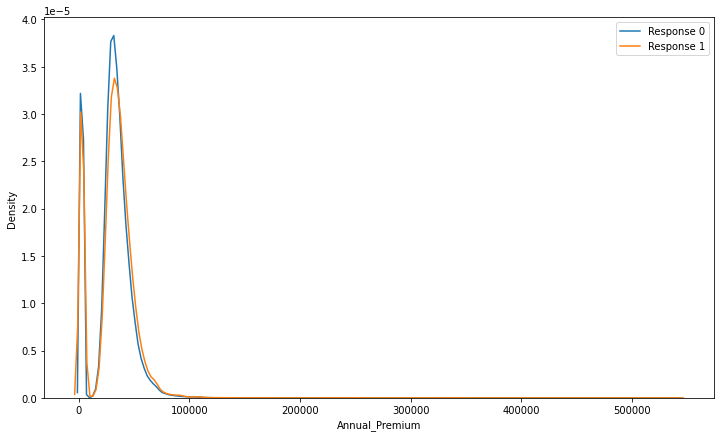

In [528]:
plt.figure(figsize=(12,7))
sns.kdeplot(df.Annual_Premium[ df.Response==0])
sns.kdeplot(df.Annual_Premium[ df.Response==1])
plt.legend(["Response 0", "Response 1"])
plt.xlabel("Annual_Premium")
plt.show()

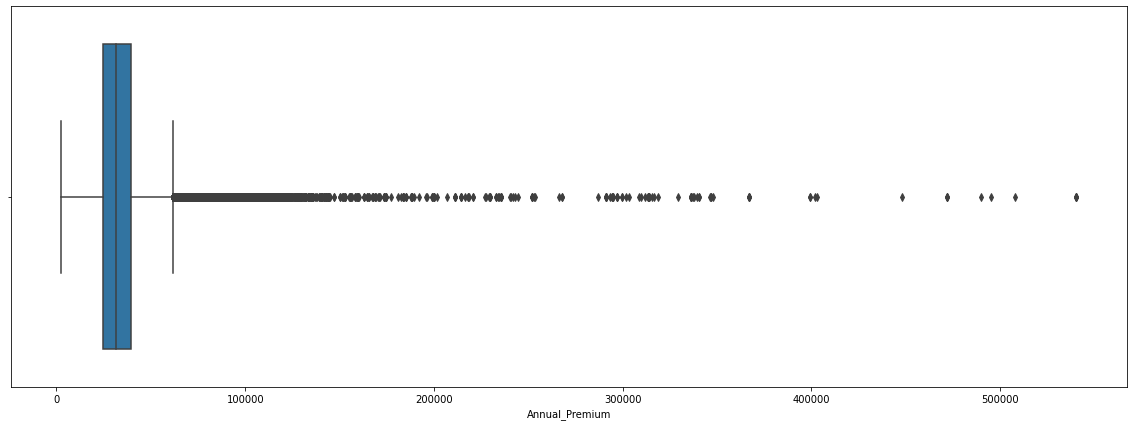

In [529]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df,x='Annual_Premium')
plt.show()

In [530]:

Premium=df['Annual_Premium']
print("Annual_Premium Boxplot details: ")
print("Minimum: ",min(Premium))
print("Maximum: ",max(Premium))
print("Quantile Q1: ",np.quantile(Premium,0.25))
print("Median Q2: ",np.median(Premium))
print("Quantile Q3: ",np.quantile(Premium,0.75))

Annual_Premium Boxplot details: 
Minimum:  2630.0
Maximum:  540165.0
Quantile Q1:  24405.0
Median Q2:  31669.0
Quantile Q3:  39400.0


Lower inner fence Q1- 1.5 * IQR 

Upper inner fence Q3 +1.5 * IQR 

Lower outer fence Q1- 3 * IQR 

Upper outer fence Q3+ 3* IQR

Points beyond the inner fences in either direction are mild outliers; points beyond the outer fences in either direction are extreme outliers.


In [531]:
# Outliers = Q3 + 1.5(Q3-Q1)    | Q3-Q1: Interquartile Range
mild_outliers=df['Annual_Premium'].quantile(q=0.75) + 1.5 * ((df['Annual_Premium'].quantile(q=0.75))-(df['Annual_Premium'].quantile(q=0.25)))
mild_outliers

61892.5

In [532]:
df[df['Annual_Premium']>mild_outliers]['Annual_Premium'].count()

10320

In [533]:
df['Annual_Premium'].quantile(q=0.25) + 1.5 * ((df['Annual_Premium'].quantile(q=0.75))-(df['Annual_Premium'].quantile(q=0.25)))

46897.5

In [534]:
extreme_outliers=df['Annual_Premium'].quantile(q=0.75) + 3 * ((df['Annual_Premium'].quantile(q=0.75))-(df['Annual_Premium'].quantile(q=0.25)))
extreme_outliers

84385.0

In [535]:
df[df['Annual_Premium']>extreme_outliers]['Annual_Premium'].count()

1837

### There are in total 10320 outliers out of which 1837 are extreme outliers
### We would be removing the extreme outliers from the data in the data pre-processing step.

In [536]:
ann=df[['Annual_Premium','Response']]

ann

,Annual_Premium,Response
0,40454.0,1
1,33536.0,0
2,38294.0,1
3,28619.0,0
4,27496.0,0
...,...,...
381104,30170.0,0
381105,40016.0,0
381106,35118.0,0
381107,44617.0,0


In [537]:
ann[ann['Response']==0].median()

Annual_Premium    31504.0
Response              0.0
dtype: float64

In [538]:
ann[ann['Response']==0]['Response'].count()

334399

In [539]:
ann[ann['Response']==1].median()

Annual_Premium    33002.0
Response              1.0
dtype: float64

In [540]:
ann[ann['Response']==1]['Response'].count()

46710

### Medain annual premium amount for customers who bought the policy and didnt buy the policy doesnt have much of a difference.

## Vintage

In [541]:
df['Vintage'].head()

0    217
1    183
2     27
3    203
4     39
Name: Vintage, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


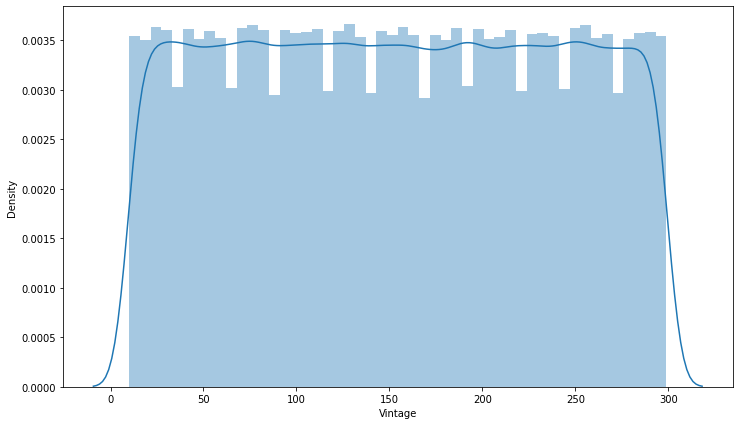

In [542]:
plt.figure(figsize=(12,7))
sns.distplot(df['Vintage'])
plt.show()

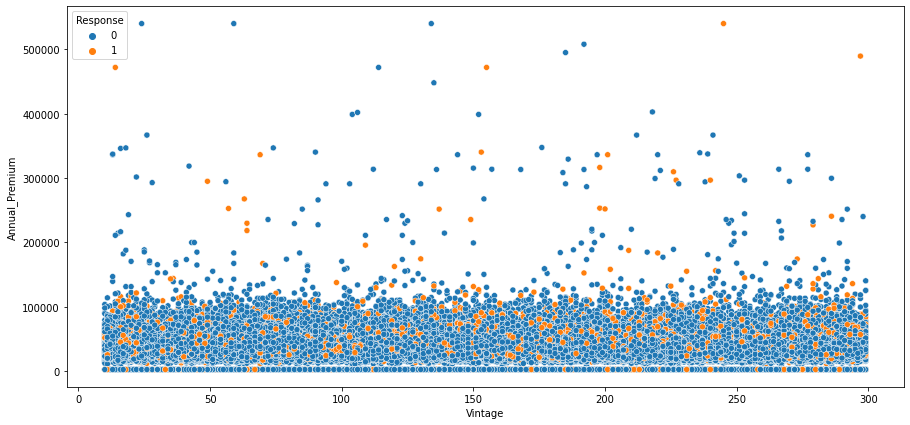

In [543]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="Vintage", y="Annual_Premium", hue="Response")
plt.show()

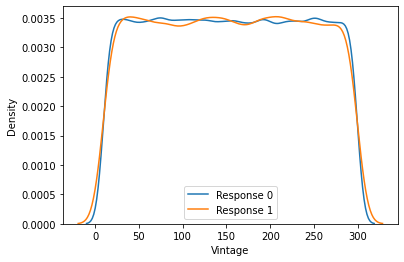

In [544]:
sns.kdeplot(df.Vintage[ df.Response==0])
sns.kdeplot(df.Vintage[ df.Response==1])
plt.legend(["Response 0", "Response 1"])
plt.xlabel("Vintage")
plt.show()

### From the data distribution, we cannot really determine whether the Vintage customer are more likely to buy the insurance policy.


# Data Preprocessing

#### **CORRELATION ANALYSIS**

#### Dropping column id

In [545]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


In [546]:
df = df.drop(columns='id')
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


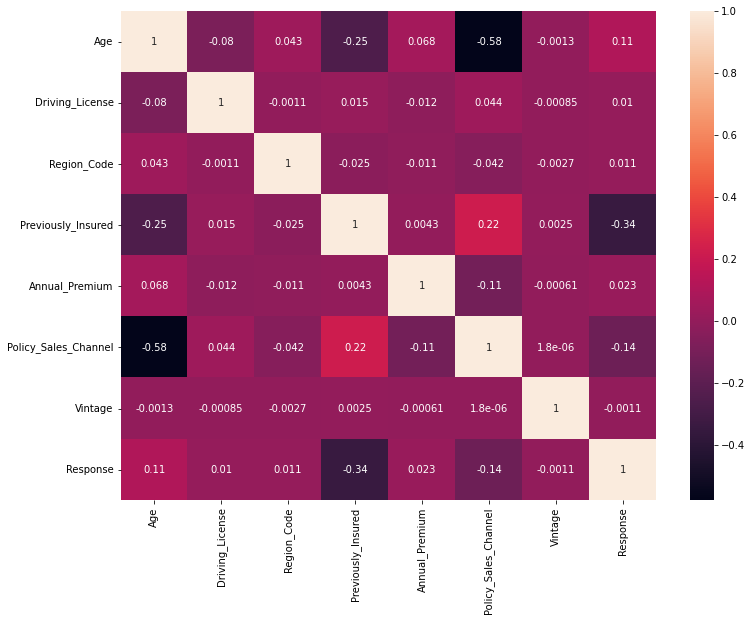

In [547]:
df.corrwith(df["Response"]).sort_values(ascending=False)
corr_df = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_df, annot=True, xticklabels=corr_df.columns, yticklabels=corr_df.columns)

#### **FEATURE ENGINEERING**

### Newer the vechicle, higher would be its value. Hence mapping vehicle age less than 1 Year with highest value and vehichle age more than 2 Years with lowest value.

### Map the Vehicle_age with values using map() function.

In [548]:
df['Vehicle_Age']=df['Vehicle_Age'].map({'< 1 Year':3,'1-2 Year':2,'> 2 Years':1})

### As the important customers are the ones with Damaged Vehicles, we would map Vehicle_Damage Yes with 1 and No with 0.

In [549]:
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1,'No':0})

### Label encoding 'Region_Code' , 'Policy_Sales_Channel' and 'Gender'




In [550]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [551]:
df['Region_Code']=le.fit_transform(df['Region_Code'])
df['Policy_Sales_Channel']=le.fit_transform(df['Policy_Sales_Channel'])

In [552]:
df['Gender']=le.fit_transform(df['Gender'])

### Dropping the entries who do not have their Driving License as it is a mandatory document for vehicle insurance.

In [553]:
z=df[df['Driving_License']==0].index
z

Int64Index([   563,   1061,   1761,   1990,   2365,   2698,   2943,   2957,
              3142,   3182,
            ...
            377284, 377375, 379151, 379518, 379615, 379869, 380088, 380537,
            380599, 380917],
           dtype='int64', length=812)

In [554]:
df.drop(z,axis=0,inplace=True)

In [555]:
df.shape

(380297, 11)

In [556]:
df[df['Driving_License']==0]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [557]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            381099, 381100, 381101, 381102, 381103, 381104, 381105, 381106,
            381107, 381108],
           dtype='int64', length=380297)

In [558]:
# df.reset_index(drop=True,inplace=True)

### **Removing extreme outliers for 'Annual_Premium'**

In [559]:
count=df[df['Annual_Premium']>extreme_outliers].index
count

Int64Index([   167,    176,    401,    429,    480,    506,    567,   1140,
              1199,   1412,
            ...
            378817, 378895, 378914, 379291, 379423, 379812, 380119, 380313,
            380815, 380998],
           dtype='int64', length=1829)

In [560]:
df['Annual_Premium'].drop(count,axis=0,inplace = True)

In [561]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,0,1,1,40454.0,24,217,1
1,1,76,1,3,0,2,0,33536.0,24,183,0
2,1,47,1,28,0,1,1,38294.0,24,27,1
3,1,21,1,11,1,3,0,28619.0,145,203,0
4,0,29,1,41,1,3,0,27496.0,145,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26,1,2,0,30170.0,24,88,0
381105,1,30,1,37,1,3,0,40016.0,145,131,0
381106,1,21,1,30,1,3,0,35118.0,153,161,0
381107,0,68,1,14,0,1,1,44617.0,119,74,0


### **Standardizing the column 'Age','Annual_Premium' and 'Vintage' for scaling it down**

#### Data is not normally distributed hence we are using standard scalar standardization method.

In [562]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [563]:
ss = StandardScaler()


In [564]:
df[['Age','Annual_Premium','Vintage']] = ss.fit_transform(df[['Age','Annual_Premium','Vintage']])

# Modelling:

In [567]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

### **UNDERSAMPLING**

### As the dataset is highly imbalanced with less number of Response values for 1, we would be UnderSampling the data ( Response=1 is our target).

In [568]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [569]:
X_us,y_us = nm.fit_resample(X,y)

In [570]:
X_us.shape

(93338, 10)

In [571]:
y_us.shape

(93338,)

In [572]:
y_us.value_counts()

0    46669
1    46669
Name: Response, dtype: int64

### Train_test split

In [573]:
from sklearn.model_selection import train_test_split

In [574]:
X_train,X_test,y_train,y_test = train_test_split(X_us,y_us,random_state=127,test_size=0.3, stratify=y_us)

### As we have Binary Classification Problem, applying below Algorithm Modelling: 

## 1) Logistic Regression

In [621]:
from sklearn.linear_model import LogisticRegression

In [622]:
logit = LogisticRegression()

In [623]:
logit.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [624]:
y_pred_l = logit.predict(X_test)

In [625]:
y_pred_l

array([1, 0, 0, ..., 0, 1, 0])

In [626]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [627]:
accuracy_score(y_test,y_pred_l)

0.5738875794586101

In [628]:
confusion_matrix(y_test,y_pred_l)

array([[8820, 5181],
       [6751, 7250]])

In [629]:
print(classification_report(y_test,y_pred_l))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60     14001
           1       0.58      0.52      0.55     14001

    accuracy                           0.57     28002
   macro avg       0.57      0.57      0.57     28002
weighted avg       0.57      0.57      0.57     28002



## 2) Naive Bayes


BernoulliNB For binary classification. Used Naive Bayes as it predicts probability(would check probabily for customer more likely to buy the policy) (though NB assumes all features are truely independent of each other)

In [630]:
from sklearn.naive_bayes import BernoulliNB  

In [631]:
nb=BernoulliNB()

In [632]:
nb.fit(X_train,y_train)

BernoulliNB()

In [633]:
y_pred_n=nb.predict(X_test)

In [634]:
accuracy_score(y_test,y_pred_n)

0.5546389543604028

In [635]:
print(classification_report(y_test,y_pred_n))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58     14001
           1       0.56      0.49      0.53     14001

    accuracy                           0.55     28002
   macro avg       0.56      0.55      0.55     28002
weighted avg       0.56      0.55      0.55     28002



## 3)Random Forest Classifier

In [636]:
from sklearn.ensemble import RandomForestClassifier

In [637]:
rf=RandomForestClassifier(n_estimators=10)

In [638]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [639]:
y_pred_rf=rf.predict(X_test)

In [640]:
confusion_matrix(y_test,y_pred_rf)

array([[10716,  3285],
       [ 5616,  8385]])

In [641]:
accuracy_score(y_test,y_pred_rf)

0.6821298478680095

In [642]:
print(classification_report(y_test,y_pred_rf)) 

              precision    recall  f1-score   support

           0       0.66      0.77      0.71     14001
           1       0.72      0.60      0.65     14001

    accuracy                           0.68     28002
   macro avg       0.69      0.68      0.68     28002
weighted avg       0.69      0.68      0.68     28002



## 4) XGBoost Classsifier

In [643]:
from xgboost import XGBRFClassifier

In [644]:
from xgboost.sklearn import XGBClassifier

In [645]:
xg=XGBClassifier(n_estimators=10)

In [646]:
xg.fit(X_train,y_train)

XGBClassifier(n_estimators=10)

In [647]:
y_pred_x=xg.predict(X_test)

In [648]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [649]:
confusion_matrix(y_test,y_pred_x)

array([[11470,  2531],
       [ 6765,  7236]])

In [650]:
accuracy_score(y_test,y_pred_x)

0.6680237125919577

In [651]:
print(classification_report(y_test,y_pred_x))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71     14001
           1       0.74      0.52      0.61     14001

    accuracy                           0.67     28002
   macro avg       0.68      0.67      0.66     28002
weighted avg       0.68      0.67      0.66     28002



### We are more concerned with precision as we would be needing less False Positive cases. Which means, actually the policy is not being bought but the model would predict it as the policy is bought.
### This would give a higher policy count to the company which may lead to loss.
### Hence we need to reduce the type 1 error.
### On the other hand, false negative is not that important as though the model predicts response as 0, it would be a response 1 which is not a loss to the company.

### The precision values for response 0 for RandomForest is higher than XGBoost hence we would be selecting **RandomForest Classifier** for our Modelling purpose.

### **Accuracy for RandomForest Classifier: 68.21%**


## Cross Validation for Evaluating our Data

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

In [652]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut

In [653]:
sk=StratifiedKFold(20)   # as data is large, making 20 k folds

In [654]:
from sklearn.model_selection import cross_val_score

In [655]:
score=cross_val_score(rf,X_us,y_us,cv=sk)

In [656]:
score

array([0.48767945, 0.63681166, 0.65995286, 0.67859439, 0.68673666,
       0.69145061, 0.69616456, 0.70366402, 0.69937862, 0.69702164,
       0.70537819, 0.69402186, 0.69166488, 0.68116563, 0.68845082,
       0.66252411, 0.66145275, 0.64473966, 0.64144878, 0.60822975])

In [657]:
score.mean()

0.6658265446595834